In [1]:
from matplotlib import pyplot as plt

from src.renkine import Renkine
from src.loader import SaturationLoader


In [2]:
saturation_loader = SaturationLoader()
T_saturation, S_saturation, H_saturation = saturation_loader.get_data()

In [3]:
# Данные для 5 точки цикла Ренкина
S_5_point = 1.6959
H_5_point = 464.5

In [4]:
renkine = Renkine(S_5_point, H_5_point)

In [5]:
(
    S1, H1, P1, T1,
    S2, H2, P2, T2,
    S3, H3, P3, T3,
    S4, H4, P4, T4,
    S5, H5, P5, T5,
    S6, H6, P6, T6,
) = renkine.renkine_data()

Расчет точки 5...
Точка 5 расчитана
Расчет точки 6...
Точка 6 расчитана
Расчет точки 1...
Точка 1 расчитана
Расчет точки 2...
Точка 2 расчитана
Расчет точки 3 и 4...
Точка 3 и 4 расчитаны
Сохранение данных Ренкина...
Данные успешно сохранены


,Точка,P (бар),T (°C),H (кДж/кг),S (кДж/кг·K),Техническое устройство
0,1,0.000000,0.0,200.000000,1.0000,После конденсатора перед поступлением в насос
1,2,20.000000,0.0,201.270316,1.0000,После насоса перед котлом
2,3,20.000000,150.0,340.910000,1.4048,В котле
3,4,20.000000,150.0,449.500000,1.6770,"После котла, перед перегревом в пароперегревателе"
4,5,20.000000,160.0,464.500000,1.6959,"После перегрева, перед турбиной"
5,6,388.888571,0.0,388.888571,1.6959,"После турбины, перед конденсатором"


In [6]:
renkine.renkine_params()

,Параметр,Значение
0,Работа насоса,1.270316
1,Работа турбины,75.611429
2,КПД Реникина,0.282419
3,КПД Карно,0.369387


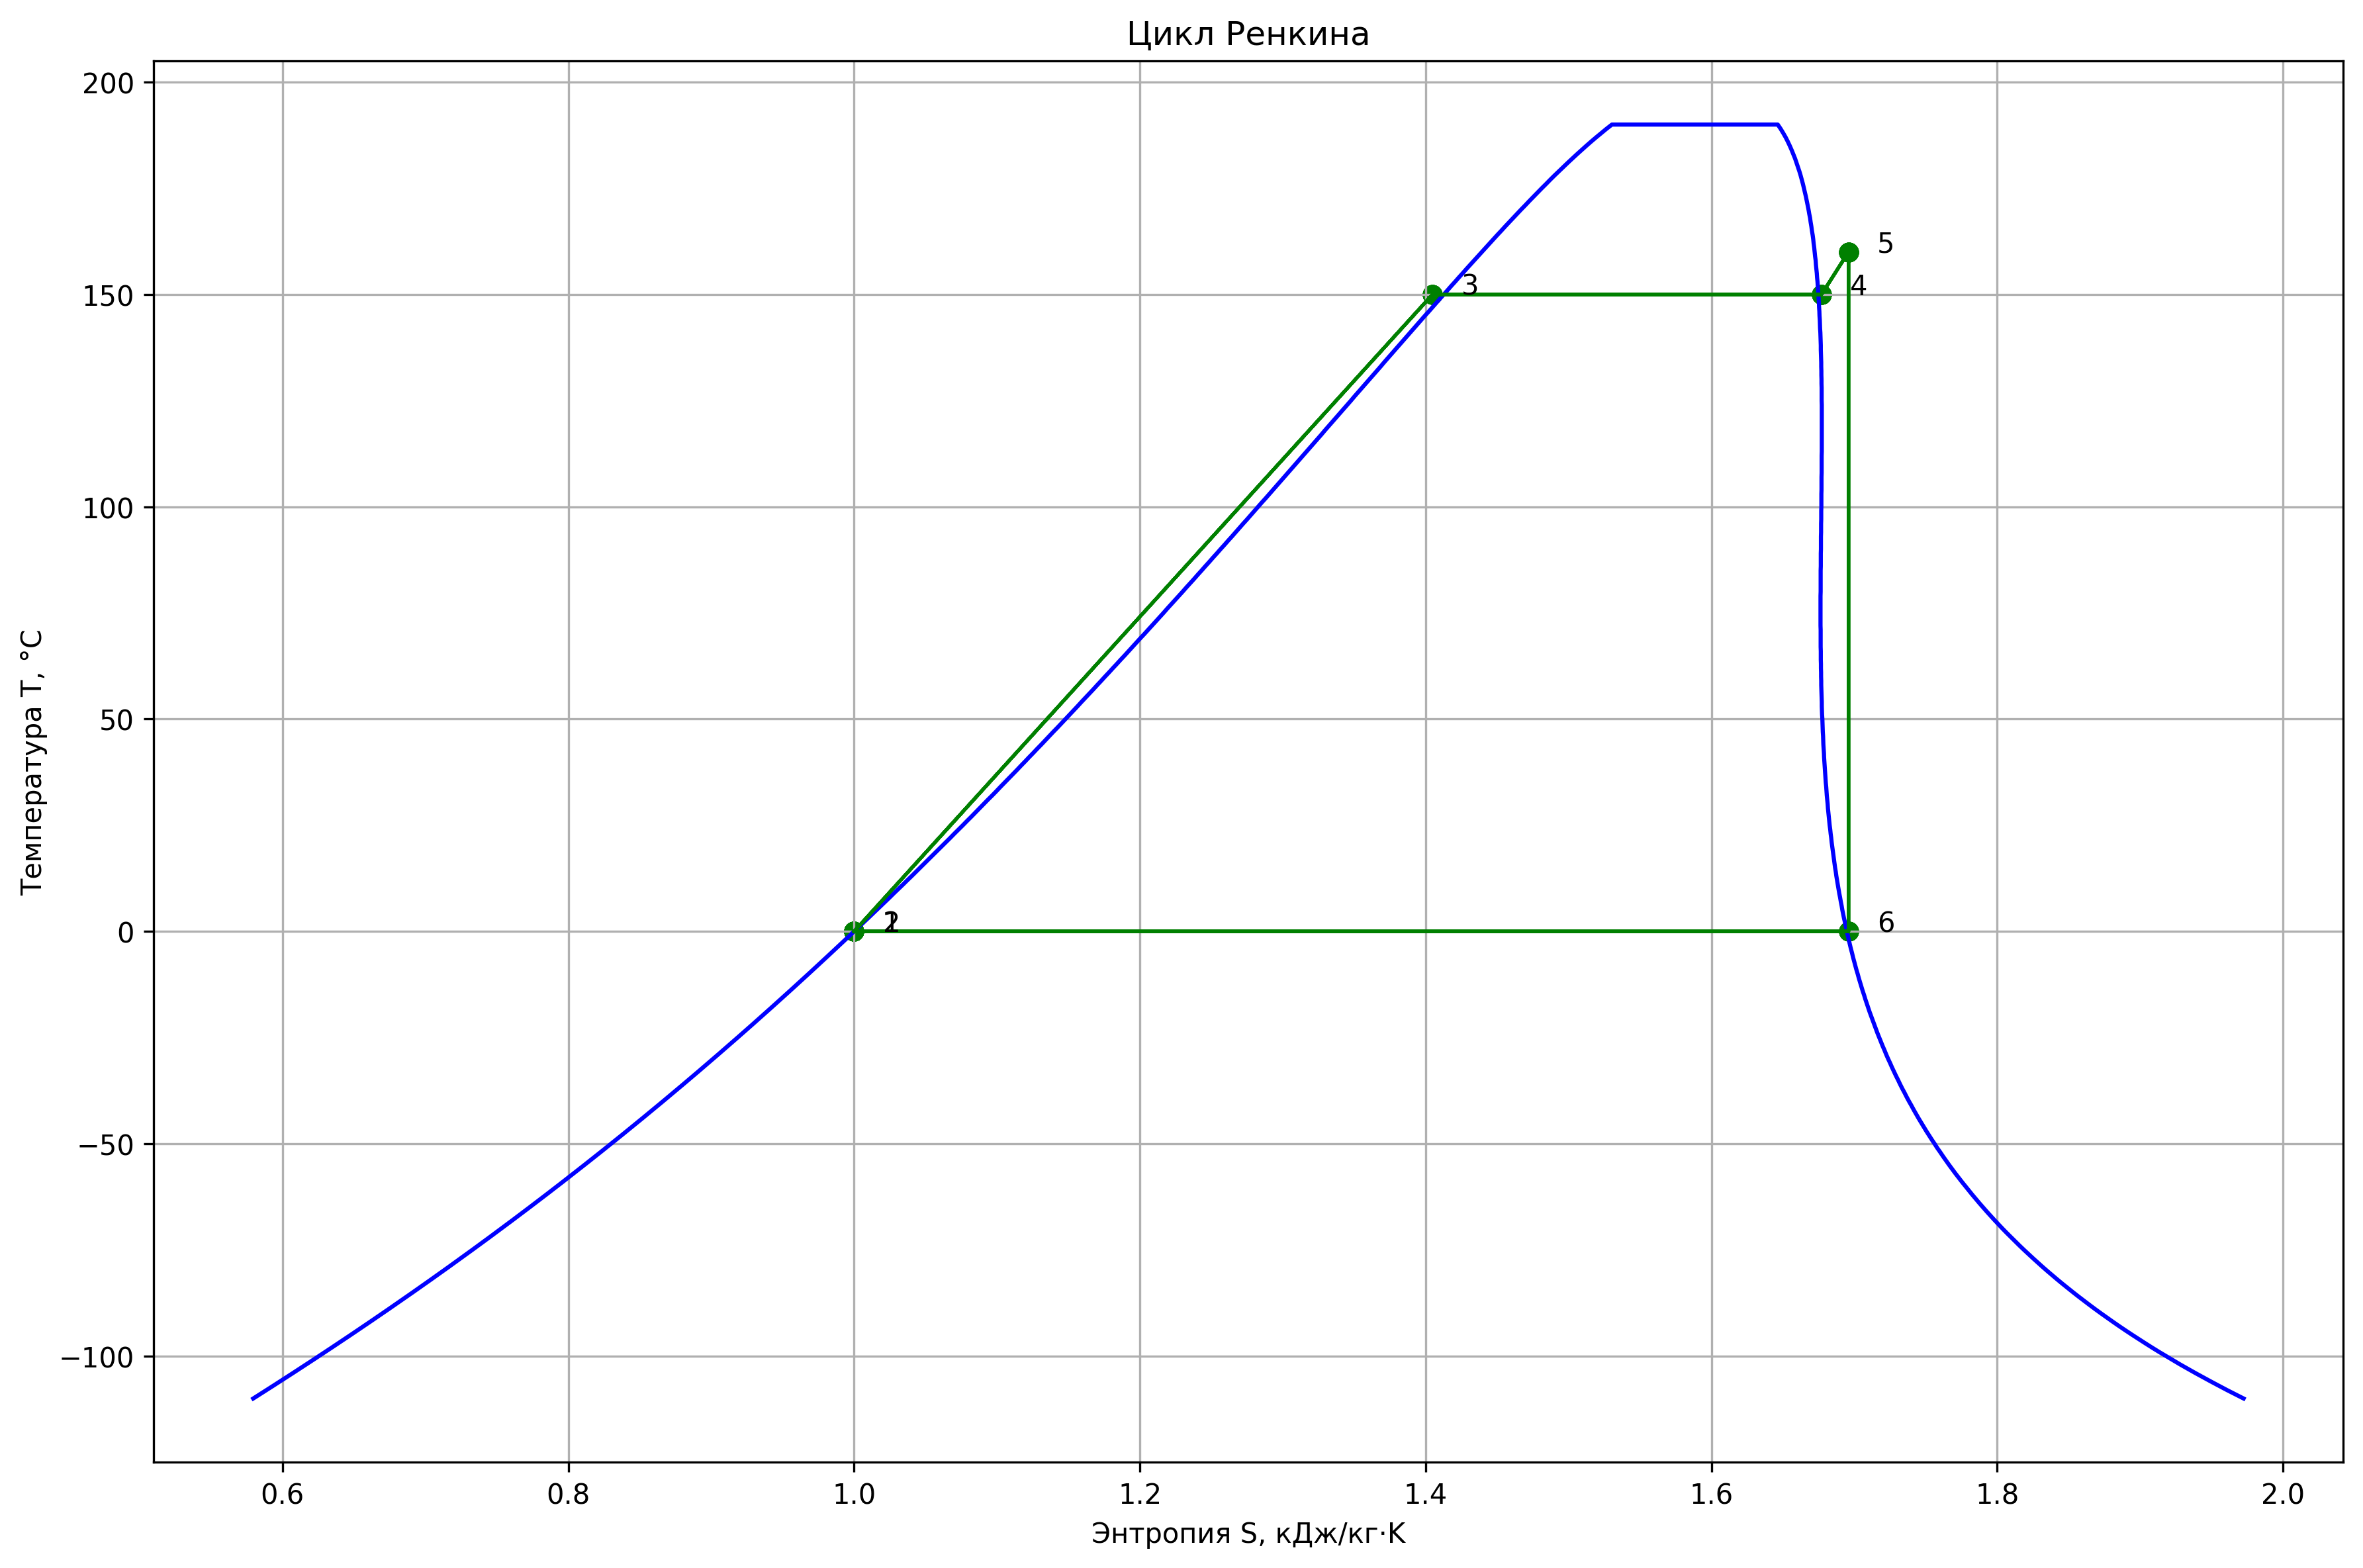

In [7]:
delta = 0.02
plt.figure(figsize=(12, 8), dpi=300)

# Кривая насыщения
plt.plot(S_saturation, T_saturation, color='blue')

# Точки и соединение линий цикла
S_RENKINE = [S1, S2, S3, S4, S5, S6, S1]
T_RENKINE = [T1, T2, T3, T4, T5, T6, T1]

for i in range(len(S_RENKINE) - 1):
    plt.plot(S_RENKINE, T_RENKINE, color='g', linewidth=1.2)
    plt.scatter(S_RENKINE, T_RENKINE, color='g', linewidth=1.2)
    plt.text(
            S_RENKINE[i] + delta, 
            T_RENKINE[i] + delta, 
            f"{i + 1}", 
            fontsize=10, 
            color='black', 
            bbox=dict(facecolor='none', alpha=0.3, edgecolor='none')
    )
plt.xlabel("Энтропия S, кДж/кг·K")
plt.ylabel("Температура T, °C")
plt.title("Цикл Ренкина")
plt.grid(True)
plt.tight_layout()
plt.show()